In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [4]:
bad_songs = pd.read_csv('datasets/bad_cleaned2.csv')
bad_songs.dropna(inplace=True)
bad_songs

,artist,song,lyrics
0,YG,BAND DRUM (feat. A$AP Rocky),I mix the 4Hunnid with the designer Stay lace...
1,Chris Cooq,Lactose,I came to rule this stage with that Budden swa...
2,Chris Cooq,Same - Original mix,Gorillaz - Song Machine Episode 7 - 4/4 mxmto...
3,Curbo,Debauchery - Original mix,"Learning is, indeed, a very great and a very..."
4,G Herbo,Bon appétit,"Young nigga eatin', uh, bon appetit, uh Messe..."
...,...,...,...
3468,King John,Mismatched,"We've been dispatched by God, sent to warn the..."
3469,Buck Meek,Cannonball!,"Beats me down by the pool, sweet Suzy, summer’..."
3470,Big Beats,Young Forever (Instrumental),Proving himself in the booth was just the be...
3471,Big Beats,Escape (Instrumental),"I'm just me, I can't be different Thoug..."


In [5]:
good_songs = pd.read_csv('datasets/good_cleaned.csv')
good_songs = good_songs[['artist','song','lyrics']].copy()
good_songs

,artist,song,lyrics
0,sam the sham and the pharaohs,wooly bully,sam the sham miscellaneous wooly bully wooly b...
1,four tops,i cant help myself sugar pie honey bunch,sugar pie honey bunch you know that i love yo...
2,we five,you were on my mind,when i woke up this morning you were on my mi...
3,the righteous brothers,youve lost that lovin feelin,you never close your eyes anymore when i kiss...
4,petula clark,downtown,when youre alone and life is making you lonel...
...,...,...,...
4861,mr probz,waves,my face above the water my feet cant touch th...
4862,nicky jam and enrique iglesias,el perdon,enrique iglesias dime si es verdad me dijeron ...
4863,one direction,night changes,going out tonight changes into something red ...
4864,drake,back to back,oh man oh man oh man not againyeah i learned ...


In [6]:
'''splitting'''
from sklearn.model_selection import train_test_split

# Combine the two dataframes into one
main = pd.concat([good_songs, bad_songs], ignore_index=True)

# Create a new column 'label' with 1 for good songs and 0 for bad songs
main['label'] = (main['lyrics'].isin(good_songs['lyrics'])) * 1

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(main['lyrics'], main['label'], test_size=0.2, random_state=42)

y_test = y_test.values.reshape(-1, 1)

In [40]:
main

,artist,song,lyrics,label
0,sam the sham and the pharaohs,wooly bully,sam the sham miscellaneous wooly bully wooly b...,1
1,four tops,i cant help myself sugar pie honey bunch,sugar pie honey bunch you know that i love yo...,1
2,we five,you were on my mind,when i woke up this morning you were on my mi...,1
3,the righteous brothers,youve lost that lovin feelin,you never close your eyes anymore when i kiss...,1
4,petula clark,downtown,when youre alone and life is making you lonel...,1
...,...,...,...,...
8334,King John,Mismatched,"We've been dispatched by God, sent to warn the...",0
8335,Buck Meek,Cannonball!,"Beats me down by the pool, sweet Suzy, summer’...",0
8336,Big Beats,Young Forever (Instrumental),Proving himself in the booth was just the be...,0
8337,Big Beats,Escape (Instrumental),"I'm just me, I can't be different Thoug...",0


In [7]:
# pd.set_option('display.max_colwidth')
result = main['lyrics'].str.contains('the').sum()
result

7830

In [8]:
'''applying bag of words'''

# Create a CountVectorizer object
vect = CountVectorizer() #(min_df=5)

text_train = vect.fit_transform(X_train)
text_test = vect.transform(X_test)

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download the English stop words from NLTK
nltk.download('stopwords')
english_stop_words = stopwords.words('english')

# Get the Spanish stop words from NLTK
nltk.download('stopwords')
spanish_stop_words = stopwords.words('spanish')

# Combine the stop words into a single list
stop_words = english_stop_words + spanish_stop_words

# Combine the two dataframes into one
main = pd.concat([good_songs, bad_songs], ignore_index=True)

# Create a new column 'label' with 1 for good songs and 0 for bad songs
main['label'] = (main['lyrics'].isin(good_songs['lyrics'])) * 1

# Replace missing values with an empty string
main['lyrics'].fillna('', inplace=True)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(main['lyrics'], main['label'], test_size=0.2, random_state=42)

# Create a CountVectorizer object with stop words
vect = CountVectorizer(min_df=5, stop_words=stop_words)

# Fit and transform the training data
text_train = vect.fit_transform(X_train)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\elits\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


c:\Users\elits\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


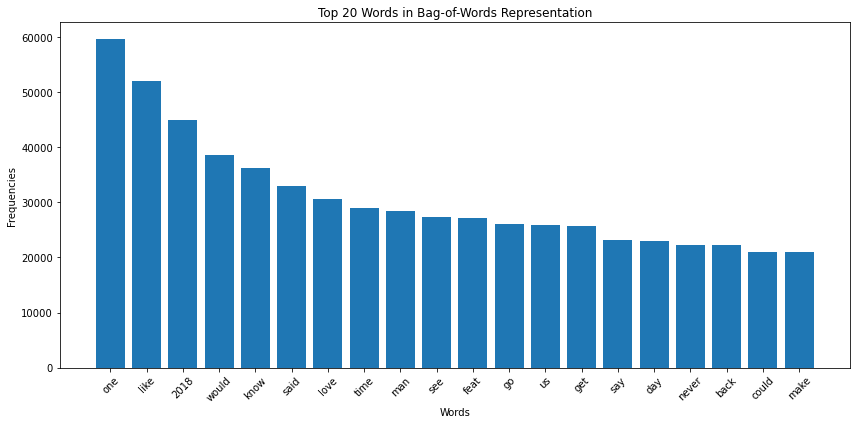

In [10]:
# Get the feature names (words) from the CountVectorizer
feature_names = vect.get_feature_names()

# Calculate the word frequencies in the training set
word_frequencies = text_train.sum(axis=0).A1

# Create a dictionary with words as keys and their corresponding frequencies as values
word_freq_dict = dict(zip(feature_names, word_frequencies))

# Sort the dictionary by word frequencies in descending order
sorted_word_freq = sorted(word_freq_dict.items(), key=lambda x: x[1], reverse=True)

# Extract the top 20 words and their frequencies
top_words = [item[0] for item in sorted_word_freq[:20]]
top_freqs = [item[1] for item in sorted_word_freq[:20]]

# Plot the top 20 words and their frequencies
plt.figure(figsize=(12, 6))
plt.bar(top_words, top_freqs)
plt.xlabel('Words')
plt.ylabel('Frequencies')
plt.title('Top 20 Words in Bag-of-Words Representation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
print("text_train:\n{}".format(repr(text_train)))
#shape of our text_train is 8106x327664 - vocabulary contains 327664 entries (features) stored as SciPy sparse matrix
#shape after constraint to have appearance in at least 5 documents, shrinks to 108184 features

text_train:
<6675x278978 sparse matrix of type '<class 'numpy.int64'>'
	with 3696204 stored elements in Compressed Sparse Row format>


In [12]:
# Create a logistic regression object and fit the model on the training data
lr = LogisticRegression()
lr.fit(text_train, y_train)

# Evaluate the model on the test data
score = lr.score(text_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9886159376872379


c:\Users\kubad\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
